In [3]:
import torch
from torch.optim import SGD
import matplotlib.pyplot as plt

# simple hack to support import module from parent directory
import sys
sys.path.append('../')

from instruct_llama.utils import LinearWarmupLRScheduler


In [4]:
# Define hyperparameters
init_lr = 0.005
max_lr = 0.05
warmup_steps = 10
total_steps = 100

# Create a simple model and optimizer
model = torch.nn.Linear(10, 2)
optimizer = SGD(model.parameters(), lr=init_lr)

# Create the scheduler
scheduler = LinearWarmupLRScheduler(optimizer, init_lr, max_lr, warmup_steps)

# Training loop
learning_rates = []
for epoch in range(total_steps):
    optimizer.step()
    scheduler.step()

    lr = optimizer.param_groups[0]['lr']
    learning_rates.append(lr)

    print(f"Epoch [{epoch+1}/{total_steps}] - Learning Rate: {lr:.4f}")


Epoch [1/100] - Learning Rate: 0.0095
Epoch [2/100] - Learning Rate: 0.0140
Epoch [3/100] - Learning Rate: 0.0185
Epoch [4/100] - Learning Rate: 0.0230
Epoch [5/100] - Learning Rate: 0.0275
Epoch [6/100] - Learning Rate: 0.0320
Epoch [7/100] - Learning Rate: 0.0365
Epoch [8/100] - Learning Rate: 0.0410
Epoch [9/100] - Learning Rate: 0.0455
Epoch [10/100] - Learning Rate: 0.0500
Epoch [11/100] - Learning Rate: 0.0500
Epoch [12/100] - Learning Rate: 0.0500
Epoch [13/100] - Learning Rate: 0.0500
Epoch [14/100] - Learning Rate: 0.0500
Epoch [15/100] - Learning Rate: 0.0500
Epoch [16/100] - Learning Rate: 0.0500
Epoch [17/100] - Learning Rate: 0.0500
Epoch [18/100] - Learning Rate: 0.0500
Epoch [19/100] - Learning Rate: 0.0500
Epoch [20/100] - Learning Rate: 0.0500
Epoch [21/100] - Learning Rate: 0.0500
Epoch [22/100] - Learning Rate: 0.0500
Epoch [23/100] - Learning Rate: 0.0500
Epoch [24/100] - Learning Rate: 0.0500
Epoch [25/100] - Learning Rate: 0.0500
Epoch [26/100] - Learning Rate: 0.

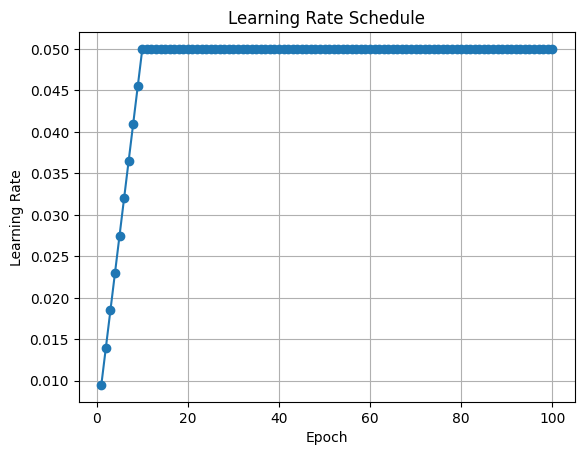

In [5]:
# Plotting the learning rate over epochs
plt.plot(range(1, total_steps + 1), learning_rates, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.grid(True)
plt.show()